In [1]:
import pandas as pd
import convenient_methods as c_m
import convenient_lists as c_l
import linkedIn_scraper
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv

# Mini Scraper
### **Important** make sure to have the config.json in the job folder. **IT DOES NOT COME WITH THE GIT HUB REPO**
I've added a mini scraper here for you to test out.  I highly recommend **unzipping the Data_CSV and Raw_Data** before hand
but the mini-scraper will create the folders for you.

### Once you click run, do not touch anything, you run the risk of messing up the process.

Here is a list of what is going on when you are running the software.
1. User puts in a search query and the number of posts they are looking for.
    - The webscraper scrapes the whole page, and depending on what the posts are there can be 3 or more per page.
2. Selenium will open a browser and log in as a LinkedIn profile.
3. Selenium will then go to the search bar and search for the search query (**search_input**) and will proceed to scroll (**search_quantity**) a set number of times.
    - This process runs intentionally slow to not trigger any anti-scraping policies that LinkedIn may have.
4. The search info is saved to a JSON file and then the browser is closed upon completion.


In [ ]:

c_m.create_folders()

search_input = 'python tricks' #input("Put in what you are looking for?")
search_quantity = int(input("At least, how many posts do you want to scrape?"))

scraping = True
while scraping:
    driver = linkedIn_scraper.scraper_log_in()
    linkedIn_scraper.search_and_scrape(search_input,search_quantity,driver)
    linkedIn_scraper.scraper_log_out(driver)
    scraping = False


Converting JSONs to CSVs, cause i like them more.

In [ ]:
c_m.json_organizer(c_l.resume_json,'resume tips.csv')
c_m.json_organizer(c_l.interview_tips_json,'interview tips.csv')
c_m.json_organizer(c_l.data_analysis_tips_json,'data analysis tips.csv')
c_m.json_organizer(c_l.job_tips_json,'job tips.csv')

In [ ]:
## If wanting to run the duplicate finder one individual file, you can use this method ##
c_m.CSV_duplicate_finder('resume tips','cleaned_resume_tips')
c_m.CSV_duplicate_finder('interview tips','cleaned_interview_tips')
c_m.CSV_duplicate_finder('data analysis tips','cleaned_data_analysis_tips')
c_m.CSV_duplicate_finder('job tips','cleaned_job_tips')
print('')


In [ ]:
## We want to pull the emojis from all NON DUPLICATED posts ##
post_list = []
for file in c_l.csv_list:
    with open(f"Data_CSV/{file}.csv", 'r', encoding='utf-8') as file_csv:
        data = csv.reader(file_csv)    
        for entry in data:
            post_list.append(entry[0])

original_posts = len(post_list)
post_list = set(post_list)
cleaned_posts = len(post_list)

c_m.emoji_organizer(post_list,"ALL_EMOJI_LIST")
print(f'There were {cleaned_posts} posts that were not duplicates of the {original_posts}.')
print(f'That means there were {original_posts-cleaned_posts} duplicated posts.')

ALL_EMOJI_LIST.csv has been created
There were 930 posts that were not duplicates of the 2436.
That means there were 1506 duplicated posts.


In [ ]:
df = pd.read_csv('Data_CSV/ALL_EMOJI_LIST.csv',header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085
0,🧑‍💻,👇,👇,➡,➡,➡,🎯,🚀,📌,📌,...,💪,4️⃣,📄,🧠,🔑,⬇️,💬,💚,❤️,♻️


### Getting the names for emojis

In [ ]:
emoji_string = " ".join(df.iloc[0])

unique_emojis = list(set(char for char in emoji_string if emoji.is_emoji(char)))

emoji_names = {e: emoji.demojize(e).strip(":").replace("_", " ").title() for e in unique_emojis if emoji.is_emoji(e)}

emoji_named_df = pd.DataFrame([unique_emojis], columns=emoji_names)

print(emoji_names)
emoji_named_df


{'🔎': 'Magnifying Glass Tilted Right', '📅': 'Calendar', '🔟': 'Keycap 10', '🦗': 'Cricket', '✍': 'Writing Hand', '📥': 'Inbox Tray', '🧵': 'Thread', '📗': 'Green Book', '⚡': 'High Voltage', '💚': 'Green Heart', '🔴': 'Red Circle', '⏱': 'Stopwatch', '🌴': 'Palm Tree', '🫂': 'People Hugging', '🚀': 'Rocket', '✉': 'Envelope', '🌐': 'Globe With Meridians', '🤖': 'Robot', '🫶': 'Heart Hands', '🧐': 'Face With Monocle', '🏵': 'Rosette', '☺': 'Smiling Face', '🗣': 'Speaking Head', '💻': 'Laptop', '🔥': 'Fire', '🤭': 'Face With Hand Over Mouth', '😫': 'Tired Face', '🩹': 'Adhesive Bandage', '🧑': 'Person', '😅': 'Grinning Face With Sweat', '👩': 'Woman', '😰': 'Anxious Face With Sweat', '😏': 'Smirking Face', '⚙': 'Gear', '👾': 'Alien Monster', '👐': 'Open Hands', '😟': 'Worried Face', '🌱': 'Seedling', '🏼': 'Medium-Light Skin Tone', '👥': 'Busts In Silhouette', '🧩': 'Puzzle Piece', '🌠': 'Shooting Star', '‼': 'Double Exclamation Mark', '📣': 'Megaphone', '🧳': 'Luggage', '🐫': 'Two-Hump Camel', '⚽': 'Soccer Ball', '🙋': 'Person

,🔎,📅,🔟,🦗,✍,📥,🧵,📗,⚡,💚,...,🌈,❌,😵,⏰,🚨,🌉,🙏,🙃,🏀,🌊
0,🔎,📅,🔟,🦗,✍,📥,🧵,📗,⚡,💚,...,🌈,❌,😵,⏰,🚨,🌉,🙏,🙃,🏀,🌊


In [ ]:
sorted_emoji = {name: [] for name in emoji_names.values()}  
not_sorted_emoji = []

for char in emoji_string:
    if char in emoji_names:
        sorted_emoji[emoji_names[char]].append(char)
    else:
        not_sorted_emoji.append(char)
        
# Thanks CHATGPT!
max_length = max(len(val) for val in sorted_emoji.values())

for key in sorted_emoji:
    sorted_emoji[key] += [pd.NA] * (max_length - len(sorted_emoji[key]))

print(sorted_emoji)


sorted_emoji_df = pd.DataFrame(sorted_emoji)

sorted_emoji_df.head()

{'Magnifying Glass Tilted Right': ['🔎', '🔎', '🔎', '🔎', '🔎', <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>

,Magnifying Glass Tilted Right,Calendar,Keycap 10,Cricket,Writing Hand,Inbox Tray,Thread,Green Book,High Voltage,Green Heart,...,Rainbow,Cross Mark,Face With Crossed-Out Eyes,Alarm Clock,Police Car Light,Bridge At Night,Folded Hands,Upside-Down Face,Basketball,Water Wave
0,🔎,📅,🔟,🦗,✍,📥,🧵,📗,⚡,💚,...,🌈,❌,😵,⏰,🚨,🌉,🙏,🙃,🏀,🌊
1,🔎,📅,🔟,<NA>,✍,📥,<NA>,<NA>,⚡,<NA>,...,<NA>,❌,<NA>,⏰,🚨,<NA>,<NA>,<NA>,🏀,<NA>
2,🔎,<NA>,🔟,<NA>,✍,<NA>,<NA>,<NA>,⚡,<NA>,...,<NA>,❌,<NA>,⏰,🚨,<NA>,<NA>,<NA>,<NA>,<NA>
3,🔎,<NA>,🔟,<NA>,✍,<NA>,<NA>,<NA>,⚡,<NA>,...,<NA>,❌,<NA>,⏰,🚨,<NA>,<NA>,<NA>,<NA>,<NA>
4,🔎,<NA>,🔟,<NA>,✍,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,❌,<NA>,⏰,🚨,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
emoji_sums_df = pd.DataFrame(sorted_emoji_df.notna().sum()).reset_index()

emoji_sums_df.rename(columns={'index':'Emoji Name',0:'Time(s) Used'},inplace=True)

emoji_sums_df['Emoji Icon'] = emoji_sums_df['Emoji Name'].map({v: k for k, v in emoji_names.items()})

top_emojis_with_bullets = emoji_sums_df.sort_values(by='Time(s) Used',ascending=False)

top_emojis_with_bullets = top_emojis_with_bullets[['Emoji Name','Emoji Icon','Time(s) Used']]

top_25_emojis_bullets_df = top_emojis_with_bullets.head(25)

In [ ]:
bullet_point_filtered_df = emoji_sums_df[~emoji_sums_df['Emoji Icon'].isin(c_l.bullet_point_emojis)]
bullet_point_filtered_df.sort_values(by='Time(s) Used',ascending=False,inplace=True)
top_25_emojis_no_bullets_df = bullet_point_filtered_df.head(25) 
print(top_25_emojis_bullets_df)


In [ ]:
sorted_emoji_df.to_csv("emoji_data_frame.csv",sep=',',index=False)
top_25_emojis_bullets_df.to_csv("top_emojis_with_bullets.csv",sep=',',index=False)
top_25_emojis_no_bullets_df.to_csv("bullet_points_removed.csv", sep=',',index=False)


# Word Cloud

{'✅': 485, '🚀': 182, '💡': 149, '🔹': 131, '❌': 107, '👇': 81, '✔': 77, '✨': 77, '📊': 75, '👉': 67, '💼': 65, '🌟': 64, '🎯': 61, '💬': 57, '🔍': 53, '📌': 52, '➡': 41, '♻': 37, '🔥': 36, '📈': 34, '🚨': 31, '⬇': 23, '💪': 23, '📝': 22, '🤔': 22, '📄': 22, '🔑': 18, '🚫': 17, '💻': 17, '🔗': 17, '👍': 15, '🔴': 14, '🔸': 13, '⚠': 13, '🏻': 13, '📩': 12, '🔄': 12, '❓': 12, '🟢': 11, '🧠': 11, '🤖': 11, '💥': 10, '🤝': 10, '❤': 9, '🔔': 9, '📚': 9, '🔟': 9, '📢': 9, '✉': 8, '🌐': 8, '👋': 8, '🚩': 8, '🛠': 8, '✍': 7, '🙌': 7, '🎓': 7, '💯': 6, '➕': 6, '😎': 6, '♀': 6, '💎': 5, '📜': 5, '🔎': 5, '👀': 5, '🏆': 5, '▪': 5, '⏰': 5, '🧡': 4, '😉': 4, '🕵': 4, '📂': 4, '😊': 4, '🏽': 4, '🌀': 4, '👨': 4, '🌍': 4, '👔': 4, '📉': 4, '☑': 4, '😬': 4, '🛡': 4, '😁': 4, '🗣': 4, '😅': 4, '⚡': 4, '⭐': 4, '👩': 4, '⚙': 4, '🤯': 3, '🧿': 3, '🎖': 3, '✌': 3, '📧': 3, '⏳': 3, '📖': 3, '🥲': 3, '🕒': 3, '🩺': 3, '📍': 3, '🌱': 3, '⁉': 3, '🛑': 3, '🔖': 3, '😱': 3, '📁': 3, '♂': 3, '✂': 3, '🎁': 3, '😂': 3, '👗': 3, '💰': 2, '©': 2, '❗': 2, '🔧': 2, '🆔': 2, '🏀': 2, '🔁': 2, '🐍': 2, '🖥': 2,

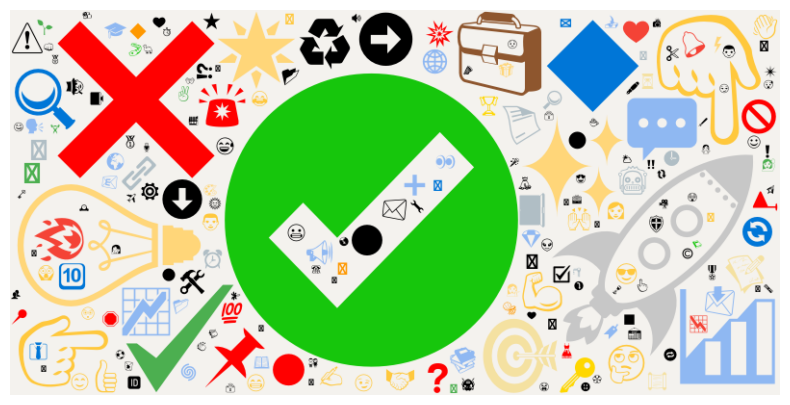

In [33]:
emoji_frequencies = top_emojis_with_bullets.set_index("Emoji Icon")["Time(s) Used"].to_dict()
print(emoji_frequencies)


def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return c_l.emoji_colors.get(word, "black")


wordcloud = WordCloud(font_path="EmojiOneBW.otf", width=800,height=400, background_color="#f4f2ee",color_func=color_func).generate_from_frequencies(emoji_frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
top_25_emojis_bullets_df.plot(
    x='Time(s) Used', 
    y='Emoji Name', 
    kind='barh', 
    legend=False,  
    color='#0a66c2',

)
plt.gcf().set_facecolor('#f2f2f2')
plt.xlabel('Time(s) Used')
plt.ylabel('Emoji Icon')
plt.title('Top 25 (with Bullets)')


plt.show()

In [ ]:
top_25_emojis_no_bullets_df.plot(
    x='Time(s) Used', 
    y='Emoji Name', 
    kind='barh', 
    legend=False,  
    color='#0a66c2'  
)
plt.gcf().set_facecolor('#f2f2f2')
plt.xlabel('Time(s) Used')
plt.ylabel('Emoji Name')
plt.title('Top 25 (without Bullets)')

plt.show()